In [24]:
%load_ext autoreload
%autoreload 2

In [25]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from numpy import matmul as mm
import math
from scipy.linalg import cho_factor,cho_solve

from helpers import rdivide,ldivide, kalmanFilter

### Load the data

In [26]:
train6 = sio.loadmat('data/training6.mat')
sol6 = sio.loadmat('data/solution6.mat')

In [27]:
ball = train6['ball']
rgb = train6['rgb']
t = train6['t']
predictions = sol6['predictions']

### Visualize the data

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ball[0,:],ball[1,:],'bo-')
plt.plot(ball[0,-1],ball[1,-1],'s',
        markersize=10,markeredgecolor=[0,.5,0],
        markerfacecolor='r')
plt.plot(ball[0,0],ball[1,0],'s',
        markersize=10,markeredgecolor=[0,.5,0],
        markerfacecolor='g')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.axis('equal')

(-0.17625352376802073,
 1.8881953085812642,
 -0.3021618059562813,
 0.48145729125327125)

### Estimating the ball tracking states

In [23]:
state = np.array([0,0,0,0])
last_t,N = -1,91
myPredictions = np.zeros((2,N))
param = {}
for i in range(N):
    px,py,state,param = kalmanFilter(t[0,i],ball[0,i],
                                    ball[1,i],state,param,last_t)
    last_t = t[0,i]
    myPredictions[0,i] = px
    myPredictions[1,i] = py

NameError: name 'np' is not defined

(-0.1846540232445232,
 1.8885953323658595,
 -0.30337078691360453,
 0.5068458913570597)

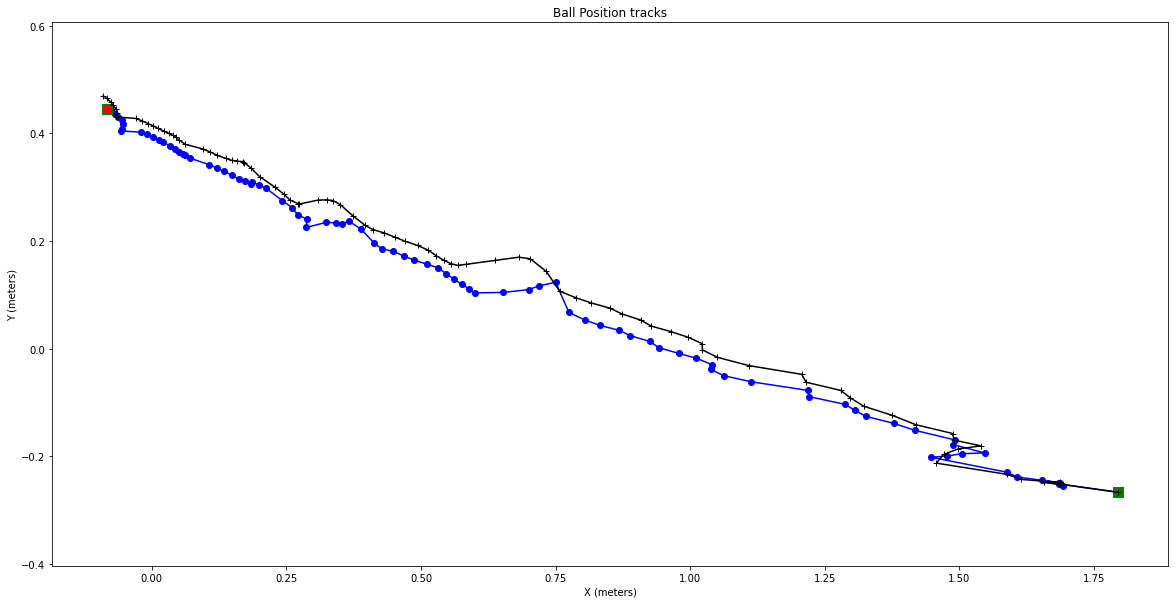

In [9]:
plt.figure(figsize=(20,10))
plt.plot(ball[0,:],ball[1,:],'bo-')
plt.plot(ball[0,-1],ball[1,-1],'s',
        markersize=10,markeredgecolor=[0,.5,0],
        markerfacecolor='r')
plt.plot(ball[0,0],ball[1,0],'s',
        markersize=10,markeredgecolor=[0,.5,0],
        markerfacecolor='g')
plt.plot(myPredictions[0,:],myPredictions[1,:],'k+-')
plt.title('Ball Position tracks')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.axis('equal')

Your Prediction: 0.21258471285727848


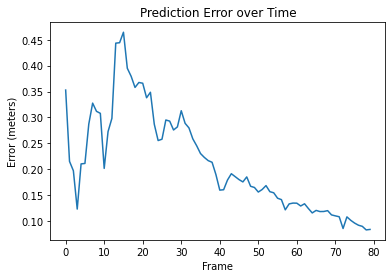

In [10]:
nSkip = 10
myError = myPredictions[:,:-11]-ball[:,nSkip:-1]
myError_dist = np.sqrt(myError[0,:]**2+myError[1,:]**2)
myError_mean = np.mean(myError_dist)

plt.plot(myError_dist)
plt.title('Prediction Error over Time')
plt.xlabel('Frame')
plt.ylabel('Error (meters)')
print('Your Prediction: '+str(myError_mean))

In [11]:
error = predictions[:,:-11]-ball[:,nSkip:-1]
error_dist = np.sqrt(error[0,:]**2+error[1,:]**2)
error_mean = np.mean(error_dist)
print('Another Kalman Prediction: '+str(error_mean))

Another Kalman Prediction: 0.14682109029351456


Text(0, 0.5, 'Error (meters)')

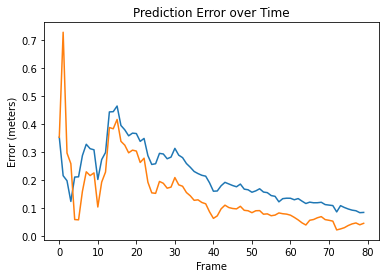

In [12]:
plt.plot(myError_dist)
plt.plot(error_dist)
plt.title('Prediction Error over Time')
plt.xlabel('Frame')
plt.ylabel('Error (meters)')

(-0.23728038344938324,
 1.8911013495184719,
 -0.30351157322871886,
 0.5098024039744603)

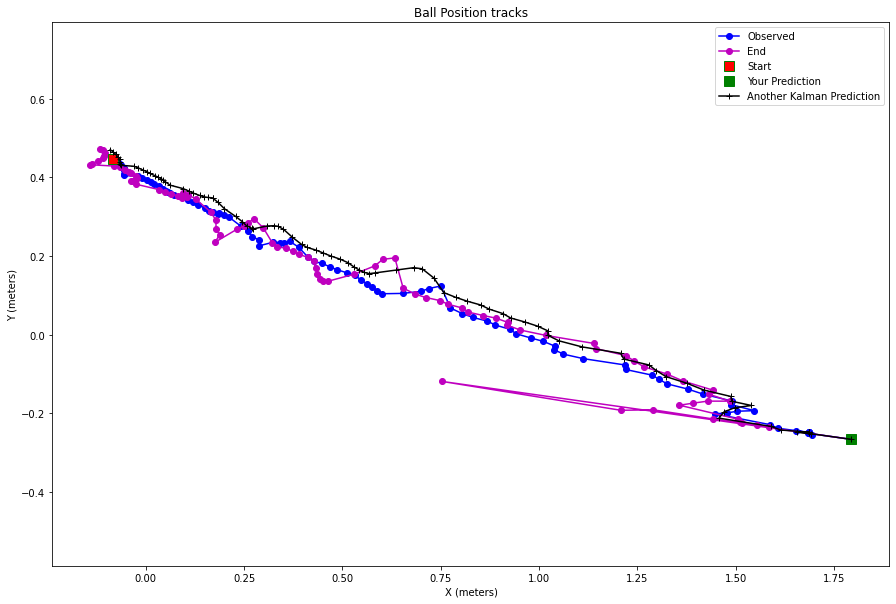

In [13]:
plt.figure(figsize=(15,10))
plt.plot(ball[0,:],ball[1,:],'bo-')
plt.plot(predictions[0,:],predictions[1,:],'mo-')
plt.plot(ball[0,-1],ball[1,-1],'s',
        markersize=10,markeredgecolor=[0,.5,0],
        markerfacecolor='r')
plt.plot(ball[0,0],ball[1,0],'s',
        markersize=10,markeredgecolor=[0,.5,0],
        markerfacecolor='g')
plt.plot(myPredictions[0,:],myPredictions[1,:],'k+-')
plt.title('Ball Position tracks')
plt.legend(['Observed','End','Start',
           'Your Prediction','Another Kalman Prediction'])
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.axis('equal')
